# FYS 4155 - Project 1 Regression analysis and resampling methods - hoabediy
 

# Introduction

Machine learning is a field of artificial intelligence which allows computers to learn from data and make predictions without being explicitly programmed. One of the two main categories of machine learning is supervised learning, and in supervised learning we know the answer to a problem, and let the computer figure out the logic behind it. This project is an example of using supervised learning by modelling a known function and real-life terrain data by using regression

The main goal of this project is to perform numerical analysis  on the (two-dimensional) Franke function as well as real life terrain data using multiple linear regression methods. This included Ordinary Linear Squares (OLS) and  Ridge regression and Lasso regression. Further one, bias-variance trade off analysis is conducted with OLS. 

The motivation for performing such a numerical analysis is to create a model which well describe the data points given which (hopefully) enables us to understand the mechanics behind the data. 


# Abstract

This summary discusses the an numreical analysis of different regression methods using the Franke Function and real terrain data. For the Franke Function, two methods (OLS and Ridge regression) showed good MSE scores but poor R2 scores when tested on new data, indicating subpar performance. This could be due to implementation issues or randomness in the testing set. On the other hand, Lasso regression consistently performed well, with a low MSE of 0.020 and an R2 score of 0.9, making it the preferred model.

Additionally, bootstrapping improved the simple OLS, resulting in a significantly lower MSE score of 0.0005. 

Regarding terrain data analysis, processing challenges arose due to the dataset's size, leading to lengthy computation times. To address this, the dataset was reduced to 15 000 data points, but this reduction caused non-convergent solutions, making model evaluation difficult.

# Theory and Method


## Regression analysis - general

The aim of regression analysis is to explain y in terms of x through a function like Y = f(X). By using linear regression we use assume this relationship to be linear. This can be written as :

$$ Y = X \beta + \epsilon$$

The approximated value of $y$, $\tilde{y}$, can be written as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$


Where Y is the dependant variable matrix, X is the design matrix, $\beta$ is the coefficient matrix and $\epsilon$ is the error term. 


$$\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T$$
$$
\boldsymbol{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T
$$
$$\boldsymbol{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T$$

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0}^1 &x_{0}^2& \dots & \dots &x_{0}^{n-1}\\
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{n-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^1 &x_{n-1}^2& \dots & \dots &x_{n-1}^{n-1}\\
\end{bmatrix}
$$

This forms the relationship:

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_2\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_i\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

Further one, $\beta_0$ is called the intercept and $\beta_1 $ to $\beta_{n-1}$ are the slopes of the model. 


Mean Square Error(MSE) is a metric corresponding to the loss/cost. MSE is defined as $$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2, $$ where $\tilde{y_i}$ is the predicted ith value and $y_i$ is the true value.

The cost metric can also be written as: $$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\} = \frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
,
$$

We want to minimize the cost function. By derivating $C(\boldsymbol{\beta})$ and setting equal to zero we can find the beta value which gives the minimum cost function. This optimal $\beta$ is given as:

$$
\boldsymbol{\beta_{optimal}} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$


R2 is a metric that quantifies how well the regression model fits the data. The best score is 1 and the score can also be negative. A score equal to 0 is a horizontal line. R2 is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$





## Unregularized regression



### OLS

Ordinary Linear Squares regression is a form of unregularized regression. The primary goals of OLS is to find the reduced MSE for the model.The main limitations of OLS are dealing with multicolineaity and overfitting. In real-world datasets, it's common to encounter multicollinearity, where independent variables are highly correlated. This can lead to unstable and unreliable coefficient estimates in standard linear regression.  
The OLS cost function is given as

$$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\} = \frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
,
$$

By this we find the $\boldsymbol{\beta_{optimal}}$ which gives the smallest MSE/cost.

$$
\boldsymbol{\beta_{optimal,OLS}} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$



## Regularized regression

Regularized regression is a technique used in regression models to prevent overfitting and to improve the models performance. This is done bs by adding a penalty term $\lambda$. The two most common types of regularized regression are Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization).

Rregularization can help control variance by adding penalties to prevent overfitting.

### Ridge regression

Ridge regression is a powerful extension of linear regression, designed to address some of its limitations, particularly when dealing with multicollinearity and overfitting. Ridge regression offers a solution to this problem by adding a penalty term $\lambda$ to the cost function.

The cost function/MSE when using ridge regression is given as

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

Similary as earlier we want to minimize this expression. By derivating, setting the expression for zero and solving for $\beta$ we get the optimal Beta ridge value as

$$\boldsymbol{\beta_{optimal,Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}$$,


Alternatively we can show that the difference in $\beta_{optimal,OLS}$ and  $\beta_{optimal,Ridge} are$, 

$y$ is defined as, $y = f(x) + \epsilon$ with a normal distributed error $\boldsymbol{\varepsilon}\sim N(0,\sigma^2)$.

The expectation value of $\epsilon$ is:

The function $f(x)$ is approximated with our model ${\tilde{y}}$, which can be expressed as:

$${\tilde{y}}$ = X \beta \approx f(x)$$ so therefore y can be expresed as (by looking at the first line):

$$ y \approx = X \beta + \epsilon $$

$X$ and $\beta$ are non-stochastic values

$$ y_i \approx \sum_j X_{ij} \beta_j + \epsilon_i$$

This can also be written more compactly as:

$$ \sum_j X_{ij} \beta_j + \epsilon_i= X_{i*} \beta + \epsilon_i$$


The expectation value of $y_i$ is (as the expectation value of $\epsilon$ is the mean which is zero):

$$\mathbb{E}(y_i) = \mathbb{E}(X_{i*} \beta) + \mathbb{E}(\epsilon_i) = X_{i*} \beta + 0 = X_{i*} \beta$$

The variance of $y_i$ si given as:

$$var[y_i]  = \mathbb{E}(y_i - \mathbb{E}(y_i))^2  = \mathbb{E}(y_i^2) - (\mathbb{E}(y_i))^2 
= \mathbb{E}[(X_{i*} \beta |+ \epsilon_i)^2] - (X_i \beta )^2 = \mathbb{E}([(X_{i*}\beta)^2 + 2X_{i*} \beta \epsilon_i + \epsilon_i^2]) - (X_{i*} \beta)^2 = \mathbb{E}(\epsilon_i^2) = \sigma^2$$ 


The expectation value of $\beta$ si given as:

$$ \mathbb{E}(\beta) = \mathbb{E}[(X^TX)^{-1} X^T y] $$

We insert $ y = X \beta$ and get:

$$ \mathbb{E}(\beta) = \mathbb{E}[(X^TX)^{-1} X^T X \beta] = \mathbb{E}(\beta) = \beta  $$

$\mathbb{E}(\beta) = \beta$ as $\beta$ is an unbiased estimator. 

$$var (\beta) = \mathbb{E}(\beta - \mathbb{E}(\beta))^2  =  \mathbb{E}([(\beta -  \mathbb{E}(\beta)][\beta -  \mathbb{E}(\beta)]^T)$$

We insert optimal $\beta $,  $\beta = (X^TX)^{-1}y$ and $\mathbb{E}(\beta) = \beta$, and get:

$$ \mathbb{E}([(\beta -  \mathbb{E}(\beta)][\beta -  \mathbb{E}(\beta)]^T) = \mathbb{E}([((X^TX)^{-1} X^Ty - \beta][((X^TX)^{-1} X^Ty - \beta]^T = (X^TX)^{-1} X^T  \mathbb{E}(YY^T)X (X^TX)^{-1} - \beta \beta^T = (X^TX)^{-1} X^T  (X \beta \beta^T X^T + \sigma^2)X (X^TX)^{-1} - \beta \beta^T = \beta \beta^T + \sigma^2(X^T X)^{-1} - \beta \beta^T = \sigma^2(X^T X)^{-1} $$

As $ \mathbb{E}[YY^T] = X \beta \beta^T X^T + \sigma^2 I$






$\boldsymbol{\beta}^{\mathrm{Ridge}}$ can be written as:

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbf{X}^{\top} \mathbf{y}
$$

And it has the expectation value:

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] = \mathbb{E} \left[ (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbf{X}^{\top} \mathbf{y} \right]
$$

Using linearity of expectations, the expectation can be moved inside:

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] = (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbb{E} \left[ \mathbf{X}^{\top} \mathbf{y} \right]
$$


$(\text{Var}(\boldsymbol{\epsilon}) = \sigma^2 \mathbf{I}_n)$ (assuming homoscedasticity). Substitute $\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}$ into the expectation:

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] = (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbb{E} \left[ \mathbf{X}^{\top} (\mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}) \right]
$$

Use properties of expectations and the fact that $(\mathbb{E}(\boldsymbol{\epsilon}) = \mathbf{0})$:

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] = (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbb{E} \left[ \mathbf{X}^{\top} \mathbf{X} \boldsymbol{\beta} \right] + (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbb{E} \left[ \mathbf{X}^{\top} \boldsymbol{\epsilon} \right]
$$

Since $(\mathbb{E}(\boldsymbol{\epsilon}) = \mathbf{0})$, the second term becomes zero:

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] = (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} \mathbb{E} \left[ \mathbf{X}^{\top} \mathbf{X} \boldsymbol{\beta} \right]
$$

$(\mathbb{E} \left[ \mathbf{X}^{\top} \mathbf{X} \boldsymbol{\beta} \right]$) is the OLS estimate of $(\boldsymbol{\beta}$), denoted as $(\boldsymbol{\beta}^{\mathrm{OLS}}$):

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] = (\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}^{\mathrm{OLS}}
$$

Ridge regression has the penalty term $\lambda$ to $\beta$ compared to OLS regression.

### Lasso regression
The choice of the regularization parameter (λ) is crucial in Lasso regression. A larger λ value will result in stronger regularization, leading to more coefficients being shrunk to zero. In contrast, a smaller
λ value allows more coefficients to retain their original values. To find the optimal
λ, cross-validation techniques are commonly employed, where various 
λ values are tested to determine which provides the best trade-off between model complexity and accuracy.

The cost function/MSE when using Lasso regression is given as
$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Similary as earlier we want to minimize this expression. By derivating, setting the expression for zero and solving for $\beta$ we get the optimal Beta Lasso value as

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\lambda sgn(\boldsymbol{\beta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$


$\boldsymbol{\beta_{optimal,Lasso}}$ has no analytical solution and is therefore most often solved using a numerical programming language package. 

## Variance, bias and expectation value


Variance and expectation value are fundamental concepts in probability theory and statistics.

The expectation value represents the average value that you would expect to obtain if you were to repeatedly sample from the same random variable. Mathematically, the expectation value $\mathbb{E}(X)$ of a random variable X is computed as a weighted average of all possible outcomes:

$$\mathbb{E}(X) = \sum_i X P(X_i) $$ where $X_i$ are the possible outcomes of X and $P(X_i)$ is the porbability of observng the outcome $X_i$.

Variance measures the spread or variability of a random variable. It quantifies how much individual data points deviate from the expectation value. $$ Var(X) = \mathbb{E}[(X - \mathbb{E}(X))^2] $$.

In summary, expectation value gives you a measure of the "average" or "typical" value of a random variable, while variance tells us how spread out the values of the random variable are. 







###  Bias-variance trade-off analysis


The bias-variance trade-off is a fundamental concept in machine learning that involves balancing two competing sources of error to build models. Bias measures how well the model fits the training data.Variance measures the model's sensitivity to variations in the training data. 

The trade-off is to find the optimal balance between bias and variance. 

High bias and low variance will not fit the training data well but is more stable and more probable of underfitting. Underfitting occurs when a model is too simplistic to capture the underlying patterns in the data.

Low bias and high variance fit the traning data well but is more probable of overfitting.Overfitting is when a model learns the training data too closely, capturing noise and random fluctuations rather than the underlying variable dependencies. 

The right baalnce between variance and bias is important that generalizes well to both the training and testing data. 


Bias-variance trade-off ris a reminder that there is no one-size-fits-all model, and the choice of model complexity should be guided by the data and problem. Achieving the right balance between bias and variance is important in building robust and accurate machine learning models.




We assume that the true data is generated from a noisy model:

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

$\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$ and $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

$ \mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]$ can be written out as:


$$ \mathbb{E} [y^2] - 2\mathbb{E} [y\tilde{y}]  + \mathbb{E} [\tilde{y}^2]$$ 

Using the linearity of expectation values.

Furthermore, variance is defined as $var (X) = \mathbb{E} [x^2] - \mathbb{E} [x]^2$


We can therefore write $\mathbb{E} [\tilde{y}^2]$ as:


$$\mathbb{E} [\tilde{y}^2] = var(\tilde{y})  + (\mathbb{E} [\tilde{y}^2])^2$$

Because $y = f(x) + \epsilon $, we can write:

$$\mathbb{E} [y^2] = \mathbb{E} [(f+ \epsilon)^2] = \mathbb{E} [f^2] + 2\mathbb{E} [f \epsilon] \mathbb{E} [\epsilon^2] = f^2 + 2*f*0 + \sigma^2 = f^2 + \sigma^2  $$

Because of the linearity of expectation values and the expecation value of $\mathbb{E} [\epsilon^2] = var(\epsilon) + \mathbb{E} [\epsilon]^2 = \sigma^2 + 0 = \sigma^2$

Then:

$$\mathbb{E} [y\tilde{y}] = \mathbb{E} [(f + \epsilon )\tilde{y}] = \mathbb{E} [f\tilde{y}] + \mathbb{E} [\epsilon \tilde{y}]$$

   

We assume $f(x)$ and $\tilde{y}$, $\epsilon$ and $\tilde{y}$ to be independent variabeles, then the expectation value can be calculated independently from each other. We can write:

$$=f \mathbb{E} [\tilde{y} ] + \mathbb{E} [\tilde{y}] \mathbb{E} [\epsilon] = f \mathbb{E} [\tilde{y} ] + 0 = f \mathbb{E} [\tilde{y} ]  $$ 


Collecting all the terms, we can therefore write that:

$$ \mathbb{E} [y^2] - 2\mathbb{E} [yy^2]  + \mathbb{E} [\tilde{y}^2] = f^2 + \sigma^2 - 2f \mathbb{E} [\tilde{y}] + var[\tilde{y}] + (\mathbb{E} [\tilde{y}])^2 =\mathbb{E} [(f - \mathbb{E} [\tilde{y}])^2] + \sigma^2 + var(\tilde{y}) = Bias[\tilde{y}] + var(\tilde{y}) +\sigma^2   $$ 

Using the quadratic formula, and with $Bias[\tilde{y}] =\mathbb{E} [(f - \mathbb{E} [\tilde{y}])^2]  $, as defined,


The goal in machine learning is to find the optimal model complexity that minimizes the cost function, which is the sum of bias and variance. This is often done through techniques like cross-validation.Cross-validation is used to estimate how well a model will generalize to new data and select models that has an appropiate bias-variance balance.

## Resampling techinques

Resampling techniques are methods used to manipulate the distribution of of a dataset, typically like overfitting or model performance issues. The main goal of resampling tecniques are to improve the quality and robustness of the model.

This section will explain two resampling techniques, bootstrapping and cross-validation.




### Bootstrapping


Bootstrapping is a statistical for estimating a quantity from a data sample. It involves generating “bootstrap” samples of the dataset (subsets) which are created by taking random data points from the original dataset uniformly. It's also possible to take the same data point multiple times. A statistical parameter can be calculated from the bootstrapped data set. We repeat these actions until we have many bootstrapped samples in our new dataset. 

Bootstrapping are particular useful when needing to estimate uncertainity and when doing non-parametric analysis (data that doesn't follow a well-known statistical distribution)


    


### Cross validation

Cross validation is a technique to undestand how well the model understands the data. The data is split into several parts/folds and it's firslty trained on some sets and then tested on some sets. This can be totally random which are training and test sets or they can be put in a system. Prevously we have sat the first 80 $%$ of the data as the training set and 20 $\%$ as the testing set. But why should it be in that order. Cross-validation is used to try all the combinations of the training and testing data in the folds and summarizes it in the end.   

## Input data

This project is an example of supervised machine learning.Firstly, the known data is the Franke function and secondly the same analysis the conducted on known terrain data.

### Franke function
The Franke function has 1D input arrays x and y. The Franke function can be expressed as $$ z = F(x,y) =$$ [see the project description] where F is the Franke function and z is the 1D output array. 

The function is computed with N = 10000 data points of x and y each. 


### Terrain data
Secondly real life terrain data is the known data to be modelled.  The terrain data is downlaoded from USGS as a GEO TIF file.

The .tif files "SRTM_data_Norway_1.tif" and SRTM_data_Norway_2.tif were downloaded from https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2023/Project1/DataFiles and the terrain was loaded using imread.This was the input data. 

NOTE The design matrix X of the terrain data consists of 600 000+ rows compared to the design matrix of the Franke function which only consists of 5 rows. 

The terrain data was shaped into a N X N matrix where N = 1000. There were to 1D input arrays x and y which were created using np.linspace. Then a mesh was created of the image pixels by using the meshgrid function. Then the MSE and R2 training and testing for OLS, Ridge and Lasso was plotted as with the Franke Function. 

The code is exactly similar to the Franke Function except the pre-porocessing of the input data, see code below.



In [1]:
    #def OLS/Ridge/Lasso
    # Load the terrain
    #terrain = imread('SRTM_data_Norway_1.tif')
    
    # Ensure that the terrain array has the desired size (N x N)
    #N = 1000
    #terrain = terrain[:N, :N]
    
    # Creates mesh of image pixels
    #x = np.linspace(0, 1, np.shape(terrain)[0])
    #y = np.linspace(0, 1, np.shape(terrain)[1])
    #x_mesh, y_mesh = np.meshgrid(x, y)
    #z = terrain
    #z = z.reshape(-1)[:3600]
    #X = create_X(x_mesh, y_mesh, n=n)
    

## Computation
Regression analysis is used to create a model of the known data. The regression methods used in this project is linear regression (Ordinary Linear Squares), ridge and lasso regression. 


$$\textbf{X} = \begin{bmatrix}
 1 & x_1 & y_1 & x_1^2 & x_1y_1 & y_1^2 \\ 
1 & x_1 & y_2 & x_2^2 & x_2y_2 & y_2^2 \\  
1 & x_1 & y_3 & x_3^2 & x_3y_3 & y_3^2
\end{bmatrix}$$

Thereafter the design matrix X and output data z is split into training and testing data.The testing data is new unknown data which is independent of the training data and is way of seeing how good the model is. 20 $\%$ of the data set was put as training data as this was within the interval often recommended. The reason for seleting 20 $\%$ of he data as testing data was because this was within the recommended range. 

$\beta_0$ is called the intercept. It was decieded to keep the intercept because it could increase the model variance. 

Furthermore, when scaling the  The data is split using the sklearn function train-test-split which splits the data randomly into training and testing data. 20 $\%$ of the data is used as as testing data and the rest as training data. Then the data was scaled by only subtracting the mean of each column $\mu$ and not the standard deviation of each column $\sigma$. This scaling is visualized as:

$$\frac{x_i - \mu_j}{\sigma_j}$$

where $x_i$ is an column in matrix X.


All of the beta values in these the linear methods described below are calculated as the optimal $\beta$ values.

### OLS
The function which calculates OLS is defined here:

The optimal beta values are calculated by 
 $\beta_{OLS} =$ np.linalg.pinv(X.T @ X) @ X.T @ y. The pseudo inverse is used instead of the inverse to avoid errors because of singular matrices. The approximated functions are calculated by matrix multiplying the design matrix X with the coefficent amtrix $\beta$ for the testing and training data. Then the MSE and R2 are calculated of both the testing and training data.

 The MSE, R2 and $\beta$ is plotted as a function of the polynomial degree by for looping over the list of polynomial degrees, as $$n_{list} = list(range(1,n+1)). The plotting is done by matplotlib. 


In [2]:
def OLS(n):
    #[...]
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2)
    scaler = StandardScaler(with_std=False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    beta = fit_beta(X_train, y_train)

    ytilde = X_train @ beta
    MSE_train = MSE(y_train, ytilde)
    R2_train = R2(y_train, ytilde)

    ypredict = X_test @ beta
    R2_test = R2(y_test, ypredict)
    MSE_test = MSE(y_test, ypredict)

### RIdge regression
The number of lambda values were set to 10 with a range from $10^{-3} to 10^{3} $. The splitting of data is done similary as in the previous chapters.  The optimal beta values are calculated for each lambda value with a foor loop. The optimal beta values are found by: beta_ridge = np.linalg.pinv(X_train.T @ X_train+lmb*I) @ X_train.T @ (y_train)
Again the approximating functions are calculated by multiplying the design matrix X with the coefficent matrix $\beta$. The MSE and plotted similary as in Chapter \ref{OLS}.


In [3]:
def ride(n,nlambdas, lambdas):
    #[...]
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2)
    scaler = StandardScaler(with_std=False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    I = np.eye(X_train.shape[1])

    for i in range(nlambdas):
        lmb = lambdas[i]
        beta_ridge[i, :] = np.linalg.pinv(X_train.T @ X_train + lmb * I) @ X_train.T @ y_train
        ytilde_ridge = X_train @ beta_ridge[i, :]
        ypredict_ridge = X_test @ beta_ridge[i, :]

        R2_train[i] = R2(y_train, ytilde_ridge)
        MSE_train[i] = MSE(y_train, ytilde_ridge)
        R2_test[i] = R2(y_test, ypredict_ridge)
        MSE_test[i] = MSE(y_test, ypredict_ridge)

### Lasso regression
The number of lambas and lamba range was set the same as in \ref{Ridge regression}. The splitting of data is done similary as in the previous chapters. The output was calculated using linear_model.Lasso with the interception included by for looping over the range of lambda values. Thsi was done as Lasso regression gives non analytical solutions. The data was fitted using X_train adn y_train. The output was predicted using  ypredictLasso = RegLasso.predict(X_test) and $\beta$ was calculated using  betaLasso[i, :] = RegLasso.coef_. The MSE and R2 is plotted similiary as previusly described. 


In [4]:
    
def Lasso(n, nlambdas, lambdas):
    #...]
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2)
    scaler = StandardScaler(with_std=False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    for i in range(nlambdas):
        lmb = lambdas[i]
        RegLasso = linear_model.Lasso(alpha=lmb, max_iter=10000, fit_intercept=True)
        RegLasso.fit(X_train, y_train)
        ytilde = RegLasso.predict(X_train)
        ypredict = RegLasso.predict(X_test)
        beta[i, :] = RegLasso.coef_
        MSE_train[i] = MSE(y_train, ytilde)
        MSE_test[i] = MSE(y_test, ypredict)
        R2_train[i] = R2(y_train, ytilde)
        R2_test[i] = R2(y_test, ypredict)

# Results and discussion

## Franke function

These results shows MSE and R2 values for training and testing set as a function of the model complexity for the Franke function.

NOTE the beta coefficents are only shown for the model with OLS to avoid too cluttered plots (due to having to plot beta coefficents for all the lambda values as a function of n for ridge and lasso regression).


NOTE All the results and discussion from analysis of the Franke function is found by the Python code in Appendix A.

### OLS


Regarding the MSE, up to polynomial order 3 the testing data has lower MSE score = 0.04. This can be because the size of the testing and training data is different and random variability in the different sets. The training set has the lowest MSE score. This is an expected result. The reason for this is that the model overfits the training data too well, but it fits the new unexpected data(the training data)not well. In Figure 1, a polynomial model of order 4 has the highest closest fit to the Franke function. 


Regarding the R2, the model using the training data fits extremely well for polynomial order 4, but fits extremely poor for all other R2 values. The training data model fits extremely poor to the Franke function (worse than a horizontal line). 

This means that OLS creates a poor model to new and unseen data (training data) on the Franke function. 








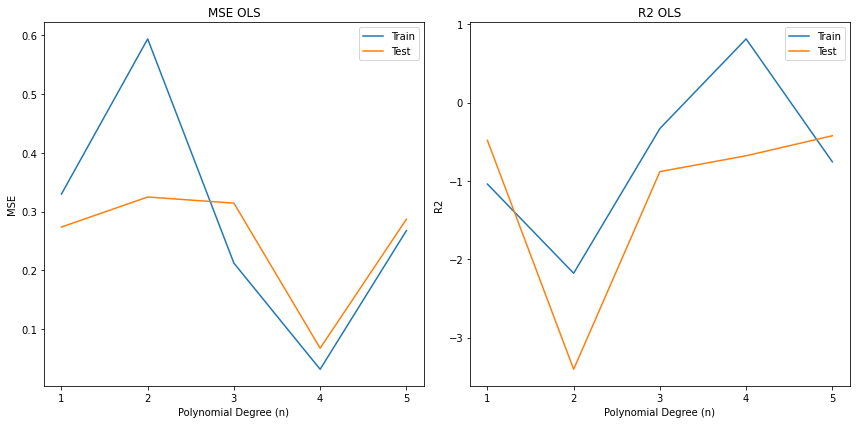

<figcaption>Figure 1: MSE and R2 with OLS for the Franke function with normal distributed noise</figcaption>

Figure 2 shows the beta coefficents and coefficent indexes for polynomial degrees 1 to 5. Coefficent index 0 is the intercept and it has value zero.Coefficent index 0 is "x" and has value betwwen 0 and 7 depending on the polynomial order.  The purple is the degree for n = 5 and it has 15 coefficent indexes. The higher order polynomials have more beta coefficent indexes and their value are more spread out compared to the lower polynomial degrees.



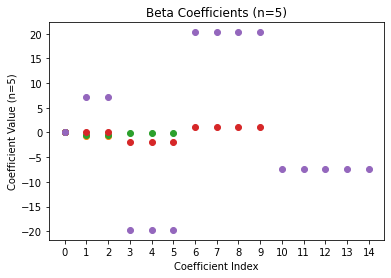

<figcaption>Figure 2: Beta coefficent as a function of n with OLS for the Franke function with normal distributed noise</figcaption>

#### Bootstrapping

Figure 3, is a result of a bias-variance analysis and shows the plot of MSE/cost, Variance and bias after such an analysis. As seen in the test/method chapter the cost is equal to the sum of variance and bias (plus the mean which is zero in this case because of scaling). The lowest MSE score is for n equal to 3 with and MSE score of 0.0005.

The Variance and MSE is significantly reduced compared to the simple OLS in Figure 1. This is as expected as the sklearn train_test_split which is used in simple OLS splits arrays randomly into training and testing sets. 

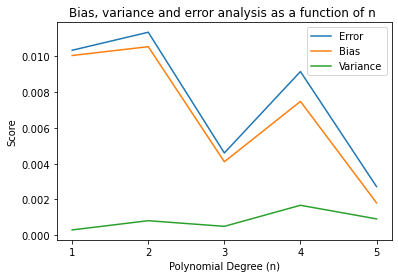

<figcaption>Figure 3: OLS regression with bootstrapping - Cost, variance and bias plotted as a function of polynomial degree /</figcaption>

### Ridge

In Figure 4, MSE train and test are plotted for different $\lambda$s as a function of polynomial order n. Different lambda ranges were tested and I found the range describes under to give the best results. Some $\lambda$ ranges even gave non-converging solution. 

There are 10 $\lambda$ values which range from $10^{-6}$ to $10^{1}$. A model with polynomial of order 3 best approximates the Franke function with noise. The largest $\lambda$ value, $\lambda = 10$ perform the worst(highest MSE score) and $\lambda = 2.2^{-4}$ perform the best (gives the lowest MSE score) for both the training and testing set. Polynomial degree 3 with $\lambda = 2.2^{-4}$ gives (the lowest) MSE training score of 0.28 and MSE testing score of 0.12. 

The training set has a lower MSE score than the training set. This is an expected result.This can be because the size of the testing and training data is different (small) and there is especially random variability in the smaller testing set. An other alternative is that there might be errors in the for loops that create the MSE arrays. 



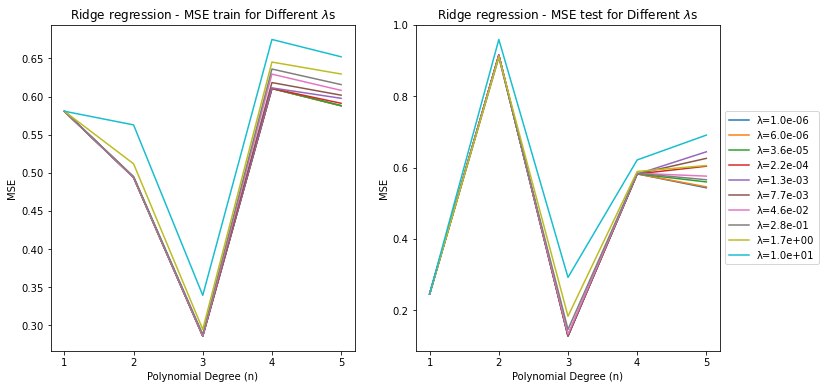



<figcaption>Figure 4: MSE with Ridge regression depending on $\lambda$ for the Franke function with normal distributed noise</figcaption>


In Figure 5, R2 train and test are plotted for different $\lambda$s. The same $\lambda$ range as in Figure 4 is used. 

The R2 scores in Figure 4 are extremely poor as they are under 0. Polynomial degree 3 with $\lambda = 2.2^{-4}$ gives best (closest to 1) R2 training score of -0.7 and R2 testing score of 0. 

This shows that the model is overfitted between polynomial degrees 0 and 5, but that the lowest MSE score gives the best R2 score. 

One reason for the poor R2 scores might be that there might be errors in the for loops that create the R2 arrays. 

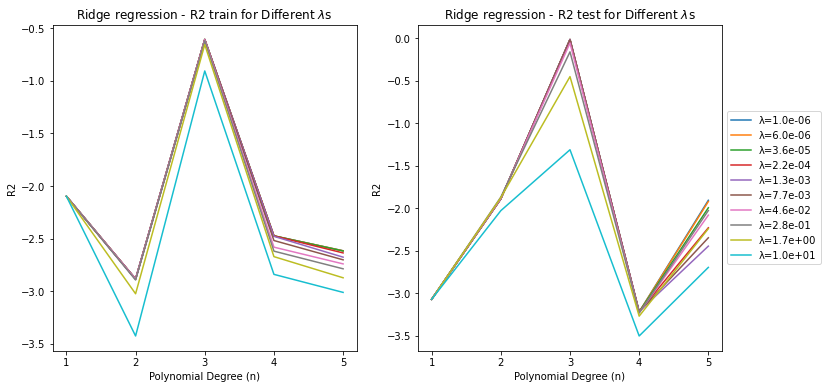


<figcaption>Figure 5: R2 with Ridge regression depending on $\lambda$ for the Franke function with normal distributed noise</figcaption>

### Lasso


In Figure 6, MSE train and test are plotted for different $\lambda$s as a function of polynomial order n. Different lambda ranges were tested and I found the range describes under to give the best results. Some $\lambda$ ranges even gave non-converging solution. 

$\lambda = 10^{-7}$ gives the lowest MSE scores for both the training and testing set independent of polynomial degree. The lowest MSE score is 0.020 with n = 5 for the training set and 0.020 with n = 2(N = 4 almost gives the same score) for the testing set.

For the testing set the MSE score increases when $n > 2$ and this might be due to overfitting. 

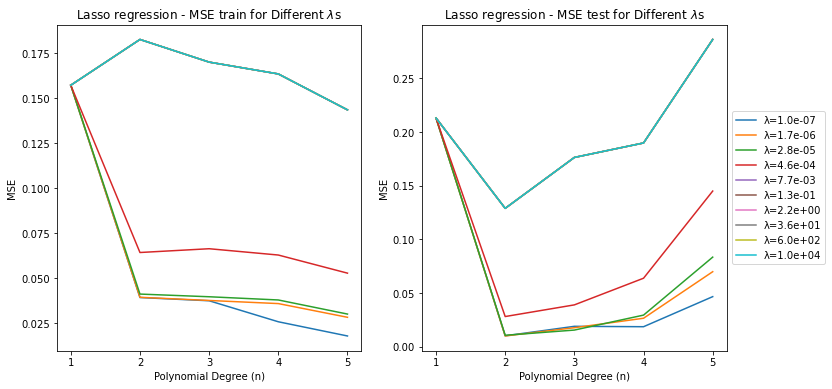

<figcaption>Figure 6: MSE with Lasso regression depending on $\lambda$ for the Franke function with normal distributed noise</figcaption>

In Figure 7, R2 train and test are plotted for different $\lambda$s. The same $\lambda$ range as in Figure 5 is used. 

As expected, $\lambda = 10^{-7}$ gives the best R2 scores independent of polynomial degree. For the training set, the polyonimal degree of 5 gives the best score of 0.9. For the testing set, the polyonimal degree of 4 gives the best score of 0.95.

This means that Lasso regression creates an excellent model to new and unseen data (training data) on the Franke function with noise. 



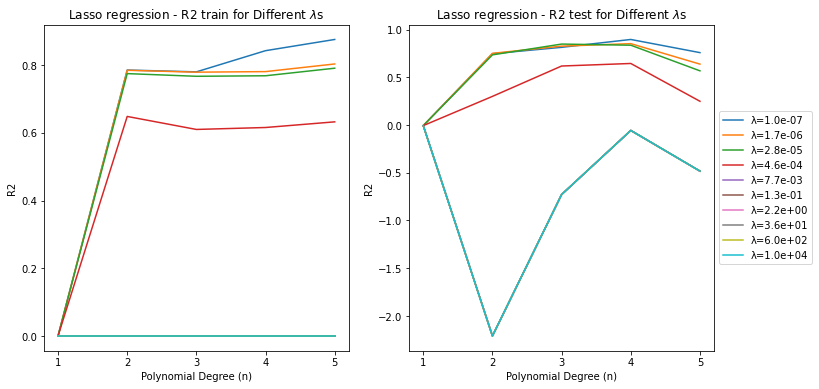

<figcaption>Figure 7: R2 with Lasso regression depending on $\lambda$ for the Franke function with normal distributed noise</figcaption>

## Terrain data


These results shows MSE (and R2 values for OLS) for training and testing set as a function of the model complexity for the real-life terrain data. For all of these plots there are problems with convergence. That's why the MSE scores are excessive. The terraind data set wa reduced to the first 15 000 data points of the terrain data was plotted due to extreme run times otherwise. This might have caused the issue with convergence even though the $\lambda$ range is from $10^{-10}$ to $10^{10}$ with 10 $\lambda$ values. Figures 7, 8 and 9 show the same plots for OLS, Ridge and Lasso regression but just for terrain data instead of for the Franke function.

NOTE All the results and discussion from analysis of the Real-life terrain data is found by the Python code in Appendix B.

### OLS



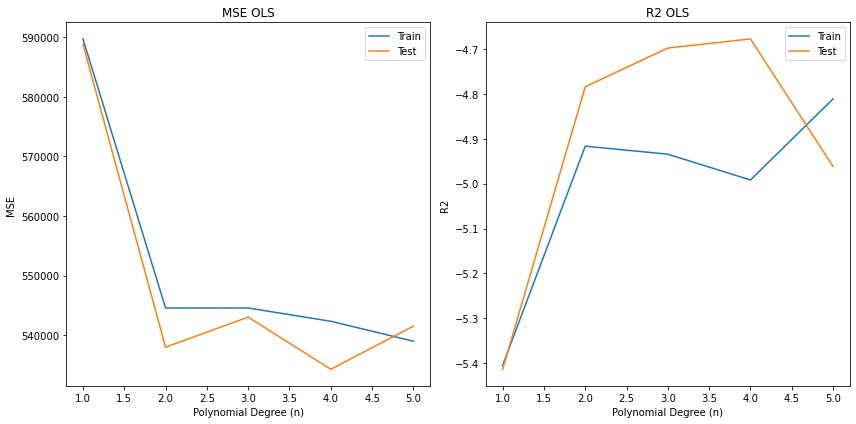

<figcaption>Figure 7: MSE and R2 with OLS for the real-life terrain data</figcaption>


### Ridge

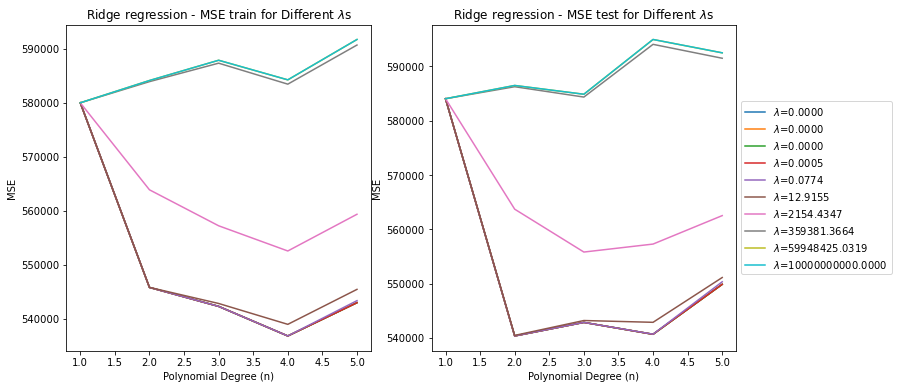

<figcaption>Figure 8: MSE with Ridge regression depending on $\lambda$ as a function of n for the real-life terrain data</figcaption>

### Lasso

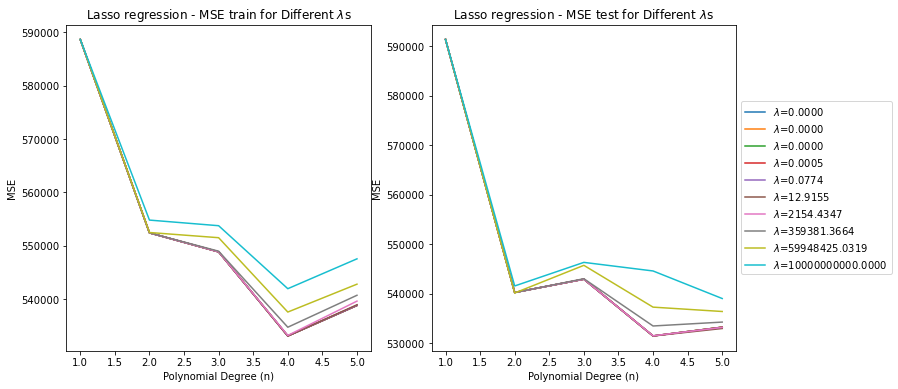

<figcaption>Figure 9: MSE with Lasso regression depending on $\lambda$ as a function of n for the real-life terrain data</figcaption>


The standardizing of data is done with respect to the
training data, such that the scaling is done after the
splitting of data into training and test set. Making
unit variance will avoid huge values. Since our data
already lies in an interval [0,1], we do not standardize
such that we obtain unit variance, and we only subtract
the mean from ever column, this is done by using
preprocessing.StandardScaler(with std=False)
from Scikit-learn.


Note that we scale training- and test set of X with
respect to the scaling of training set of X, such that the
training set does not contain information about the test
set. We do the same for the output data z.

# Conclusion


For the Franke Function, both the simple OLS and Ridge function showed good MSE scores, but extremely poor R2 scores for the testing data. These regression methods do not give good models for the Franke function with the code written. Possible error sources are faults in the manual implementation of these two methods or randomness in the testing set as it is a smaller set. Lasso regresion provided great and more expected results. Lasso regression showed the lowest MSE score of 0.020 with a R2 score of 0.9. The scores were almost similar for the testing and training set. This means that Lasso is a good performing model.

The bias-variance analysis reduced the lowest MSE score for OLS to $10^{-31}$ with similar biases and variance. In my opinion those results are suspiously low and close to the machine accuracy. Might be errors in the implementation 


For the terrain data, there were issues with the big data set which took an extremely long time to run. The data set was reduced to only 15000 data points to reduce the run time, but this gave issues with non-convegent solutions. 

# Bibliography



Applied Data Analysis and machine learning (no date) Applied Data Analysis and Machine Learning - Applied Data Analysis and Machine Learning. Available at: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/intro.html (Accessed: 01 October 2023). 

Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer, https://www.springer.com/gp/book/9780387848570.

# Appendices

## Appendix A - Python code Franke Function

The following code is used to solve exercises a-f by using the Franke function.

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def FrankeFunction(x, y):
    """
    Generate the Franke Function model with added noise.

    Parameters:
    x (numpy.ndarray): Array of x-coordinates.
    y (numpy.ndarray): Array of y-coordinates.

    Returns:
    numpy.ndarray: Array of data points.
    """
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4 + np.random.normal(0, 0.2)

def create_X(x, y, n):
    """
    Create the design matrix for 2D polynomial regression.

    Parameters:
    x (numpy.ndarray): Array of x-coordinates.
    y (numpy.ndarray): Array of y-coordinates.
    n (int): The polynomial degree.

    Returns:
    numpy.ndarray: The design matrix.
    """
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)  # Number of data points
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))  # Initialize the design matrix with ones

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)  # Number of elements for current degree
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

def fit_beta(X, y):
    """
    Fit a linear regression model and estimate coefficients.

    Parameters:
    X (numpy.ndarray): The design matrix.
    y (numpy.ndarray): Target values.

    Returns:
    numpy.ndarray: Estimated coefficients.
    """
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def R2(y_data, y_model):
    """
    Calculate the R-squared value for a model's predictions.

    Parameters:
    y_data (numpy.ndarray): Actual target values.
    y_model (numpy.ndarray): Predicted values.

    Returns:
    float: R-squared value.
    """
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data, y_model):
    """
    Calculate the Mean Squared Error (MSE) for a model's predictions.

    Parameters:
    y_data (numpy.ndarray): Actual target values.
    y_model (numpy.ndarray): Predicted values.

    Returns:
    float: Mean Squared Error.
    """
    n = np.size(y_model)  # Number of data points
    return np.sum((y_data - y_model) ** 2) / n

def OLS(n):
    """
    Perform Ordinary Least Squares (OLS) regression.

    Parameters:
    n (int): Polynomial degree.

    Returns:
    tuple: A tuple containing MSE_train, MSE_test, R2_train, R2_test, and beta.
    """
    x = np.arange(0, 1, 0.05)  # Array of x-coordinates
    y = np.arange(0, 1, 0.05)  # Array of y-coordinates
    z = FrankeFunction(x, y)  # Generate data points using FrankeFunction
    X = create_X(x, y, n=n)  # Create the design matrix for given degree

    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2)  # Split data into train and test sets
    scaler = StandardScaler(with_std=False).fit(X_train)  # Initialize the StandardScaler
    X_train = scaler.transform(X_train)  # Transform the training data
    X_test = scaler.transform(X_test)  # Transform the testing data
    
    beta = fit_beta(X_train, y_train)  # Fit the model and estimate beta coefficients
    
    ytilde = X_train @ beta  # Predictions on the training data
    MSE_train = MSE(y_train, ytilde)  # Calculate MSE on training data
    R2_train = R2(y_train, ytilde)  # Calculate R-squared on training data

    ypredict = X_test @ beta  # Predictions on the test data
    R2_test = R2(y_test, ypredict)  # Calculate R-squared on test data
    MSE_test = MSE(y_test, ypredict)  # Calculate MSE on test data
    
    return MSE_train, MSE_test, R2_train, R2_test, beta

def Ridge(n, nlambdas, lambdas):
    """
    Perform Ridge regression.

    Parameters:
    n (int): Polynomial degree.
    nlambdas (int): Number of lambda values to test.
    lambdas (numpy.ndarray): Array of lambda values.

    Returns:
    tuple: A tuple containing MSE_train, MSE_test, R2_train, R2_test, and beta_ridge.
    """
    x = np.arange(0, 1, 0.05)  
    y = np.arange(0, 1, 0.05)  
    z = FrankeFunction(x, y)  
    X = create_X(x, y, n=n)  

    MSE_train = np.zeros(nlambdas) 
    MSE_test = np.zeros(nlambdas) 
    R2_train = np.zeros(nlambdas) 
    R2_test = np.zeros(nlambdas)  
    beta_ridge = np.zeros((nlambdas, X.shape[1]))  # Array to store beta values for different lambdas

    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2)  
    scaler = StandardScaler(with_std=False).fit(X_train)  
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test) 
    I = np.eye(X_train.shape[1])  # Identity matrix

    for i in range(nlambdas):
        lmb = lambdas[i]  # Current lambda value
        beta_ridge[i, :] = np.linalg.pinv(X_train.T @ X_train + lmb * I) @ X_train.T @ y_train  # Ridge regression
        ytilde_ridge = X_train @ beta_ridge[i, :]  # Predictions on the training data
        ypredict_ridge = X_test @ beta_ridge[i, :]  # Predictions on the test data

        R2_train[i] = R2(y_train, ytilde_ridge)  # Calculate R-squared on training data
        MSE_train[i] = MSE(y_train, ytilde_ridge)  # Calculate MSE on training data
        R2_test[i] = R2(y_test, ypredict_ridge)  # Calculate R-squared on test data
        MSE_test[i] = MSE(y_test, ypredict_ridge)  # Calculate MSE on test data

    return MSE_train, MSE_test, R2_train, R2_test, beta_ridge

def Lasso(n, nlambdas, lambdas):
    """
    Perform Lasso regression.

    Parameters:
    n (int): Polynomial degree.
    nlambdas (int): Number of lambda values to test.
    lambdas (numpy.ndarray): Array of lambda values.

    Returns:
    tuple: A tuple containing MSE_train, MSE_test, R2_train, R2_test, and beta.
    """
    x = np.arange(0, 1, 0.05)  
    y = np.arange(0, 1, 0.05)  
    z = FrankeFunction(x, y)  
    X = create_X(x, y, n=n)  
    lambdas = np.logspace(-3, 2, nlambdas)  # Array of lambda values

    MSE_train = np.zeros(nlambdas)  
    MSE_test = np.zeros(nlambdas)  
    R2_train = np.zeros(nlambdas)  
    R2_test = np.zeros(nlambdas)  
    beta = np.zeros((nlambdas, X.shape[1])) 

    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2) 
    scaler = StandardScaler(with_std=False).fit(X_train) 
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test) 

    for i in range(nlambdas):
        lmb = lambdas[i]  # Current lambda value
        RegLasso = linear_model.Lasso(alpha=lmb, max_iter=10000, fit_intercept=True)  # Lasso regression model
        RegLasso.fit(X_train, y_train)  # Fit the model
        ytilde = RegLasso.predict(X_train)  # Predictions on the training data
        ypredict = RegLasso.predict(X_test)  # Predictions on the test data
        beta[i, :] = RegLasso.coef_  # Coefficients

        MSE_train[i] = MSE(y_train, ytilde)  # Calculate MSE on training data
        MSE_test[i] = MSE(y_test, ypredict)  # Calculate MSE on test data
        R2_train[i] = R2(y_train, ytilde)  # Calculate R-squared on training data
        R2_test[i] = R2(y_test, ypredict)  # Calculate R-squared on test data

    return MSE_train, MSE_test, R2_train, R2_test, beta

def bootstrap():
     """
   Perform bootstrap resampling and polynomial regression analysis.


   Returns:
   - bias (numpy.ndarray): Array containing the squared bias for each polynomial degree.
   - error (numpy.ndarray): Array containing the mean squared error for each polynomial degree.
   - variance (numpy.ndarray): Array containing the variance for each polynomial degree.
   """
    
    # Define some parameters
    n = 40              # Number of data points
    n_boostraps = 100   # Number of bootstrap samples
    maxdegree = 5       # Maximum polynomial degree for regression

    # Generate synthetic data
    x = np.arange(0, 1, 0.05)
    y = np.arange(0, 1, 0.05)  
    z = FrankeFunction(x, y)  # Calculate a function of x and y (you may need to define FrankeFunction elsewhere)
    
    # Initialize arrays to store results
    error = np.zeros(maxdegree)
    bias = np.zeros(maxdegree)
    variance = np.zeros(maxdegree)
    polydegree = np.zeros(maxdegree)
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), z, test_size=0.2)
    # Reshape x_train and x_test

    
    # Loop over different polynomial degrees
    for degree in range(maxdegree):
        # Create a polynomial regression model with the specified degree
        model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
        
        # Initialize an array to store predictions from bootstrap samples
        y_pred = np.empty((y_test.shape[0], n_boostraps))
        
        # Perform bootstrapping
        for i in range(n_boostraps):
            x_, y_ = resample(x_train, y_train)  # Resample the training data with replacement
            y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()  # Fit the model and make predictions
        
        # Calculate and store error, bias^2, and variance
        polydegree[degree] = degree
        error[degree] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
        bias[degree] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
        variance[degree] = np.mean(np.var(y_pred, axis=1, keepdims=True))
        
        # Print the results for the current degree
        print('Polynomial degree:', degree)
        print('Error:', error[degree])
        print('Bias^2:', bias[degree])
        print('Var:', variance[degree])
        print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
    
    # Return the bias, error, and variance arrays
    return bias, error, variance

# Define polynomial degree, lambda values, and other parameters
n = 5  # polynomial degree
n_list = list(range(1, n + 1))  # List of polynomial degrees
nlambdas = 10
lambdas_Ridge = np.logspace(-6, 1, nlambdas)
lambdas_Lasso = np.logspace(-7, 4, nlambdas)
N = 10000  # Total data points

# OLS
mse_train_OLS = np.zeros(n)
mse_test_OLS = np.zeros(n)
r2_train_OLS = np.zeros(n)
r2_test_OLS = np.zeros(n)

# Ridge
mse_train_Ridge = np.zeros((n, nlambdas))
mse_test_Ridge = np.zeros((n, nlambdas))
r2_train_Ridge = np.zeros((n, nlambdas))
r2_test_Ridge = np.zeros((n, nlambdas))

# Lasso
mse_train_Lasso = np.zeros((n, nlambdas))
mse_test_Lasso = np.zeros((n, nlambdas))
r2_train_Lasso = np.zeros((n, nlambdas))
r2_test_Lasso = np.zeros((n, nlambdas))

# Loop over polynomial degrees and compute performance metrics for each method
for i in range(n):
    mse_train_OLS[i], mse_test_OLS[i], r2_train_OLS[i], r2_test_OLS[i], _ = OLS(i)
    mse_train_Ridge[i, :], mse_test_Ridge[i, :], r2_train_Ridge[i, :], r2_test_Ridge[i, :], _ = Ridge(i, nlambdas, lambdas_Ridge)
    mse_train_Lasso[i, :], mse_test_Lasso[i, :], r2_train_Lasso[i, :], r2_test_Lasso[i, :], _ = Lasso(i, nlambdas, lambdas_Lasso)

# OLS plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(n_list, mse_train_OLS, label='Train')
plt.plot(n_list, mse_test_OLS, label='Test')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
plt.title('MSE OLS')
plt.xticks(n_list)
plt.legend()
plt.subplot(122)
plt.plot(n_list, r2_train_OLS, label='Train')
plt.plot(n_list, r2_test_OLS, label='Test')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R2')
plt.xticks(n_list)
plt.title('R2 OLS')
plt.legend()
plt.tight_layout()

# Ridge plots MSE
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Ridge regression - MSE train for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, mse_train_Ridge[:, j], label = f'λ={lambdas_Ridge[j]:.1e}')
plt.subplot(122)
plt.title('Ridge regression - MSE test for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, mse_test_Ridge[:, j], label = f'λ={lambdas_Ridge[j]:.1e}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Ridge plots R2
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Ridge regression - R2 train for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R2')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, r2_train_Ridge[:, j], label = f'λ={lambdas_Ridge[j]:.1e}')
plt.subplot(122)
plt.title('Ridge regression - R2 test for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R2')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, r2_test_Ridge[:, j], label = f'λ={lambdas_Ridge[j]:.1e}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Lasso plots MSE
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Lasso regression - MSE train for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, mse_train_Lasso[:, j], label = f'λ={lambdas_Lasso[j]:.1e}')
plt.subplot(122)
plt.title('Lasso regression - MSE test for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, mse_test_Lasso[:, j], label = f'λ={lambdas_Lasso[j]:.1e}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Lasso plots R2
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Lasso regression - R2 train for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R2')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, r2_train_Lasso[:, j], label = f'λ={lambdas_Lasso[j]:.1e}')
plt.subplot(122)
plt.title('Lasso regression - R2 test for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R2')
plt.xticks(n_list)
for j in range(nlambdas):
    plt.plot(n_list, r2_test_Lasso[:, j], label = f'λ={lambdas_Lasso[j]:.1e}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




#Bootstrapping

bias, error, variance = bootstrap()


plt.plot(n_list, error, label='Error')
plt.plot(n_list, bias, label='Bias')
plt.plot(n_list, variance, label='Variance')
plt.xlabel('Polynomial Degree (n)')
plt.xticks(n_list)
plt.ylabel('Score')
plt.title('Bias, variance and error analysis as a function of n ')
plt.legend()
plt.show()



## Apppendix B - Real-life terrain data

The following code is used to solve exercise g (which includeds exercises a-f) by using the Real-life terrain data.

In [ ]:
# -*- coding: utf-8 -*-


import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imageio.v3 import imread
from sklearn import linear_model



def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((15000, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x[:15000] ** (i - k)) * (y[:15000] ** k)

    return X


def fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y



def R2(y_data, y_model):
    """
   Computed R2 score of model.

   Params:
   y_data: Array
       array real data points
   y_model: Array
       array of predicted response by trained model

   Returns:
   R2 score of model
   """
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    """
   Computed MSE of model.

   Params:
   y_data: Array
       array real data points
   y_model: Array
       array of predicted response by trained model

   Returns:
      """
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n



def OLS(n):
    """
   Perform Ordinary Least Squares (OLS) regression.

   Parameters:
   n (int): Polynomial order.

   Returns:
   MSE_train (float): Training Mean Squared Error (MSE).
   MSE_test (float): Testing Mean Squared Error (MSE).
   R2_train (float): Training R2 score.
   R2_test (float): Testing R2 score.
   beta (ndarray): Fitted beta parameters.
   """
   
    # Load the terrain image
    terrain = imread('SRTM_data_Norway_1.tif')

    # Ensure that the terrain array has the desired size (N x N)
    N = 10000  # Desired size of the terrain
    size = 15000  # Number of data points to keep
    terrain = terrain[:N, :N]

    # Create a mesh of image pixels
    x = np.linspace(0, 1, terrain.shape[0])
    y = np.linspace(0, 1, terrain.shape[1])
    x_mesh, y_mesh = np.meshgrid(x, y)
    z_mesh = terrain.T  # Transpose for consistent shape

    # Reduce the data to 15000 points
    N = np.array(range(x_mesh.size))
    kept_data = np.random.permutation(N)[:size]
    x_red, y_red, z_red = x_mesh.flatten()[kept_data], y_mesh.flatten()[kept_data], z_mesh.flatten()[kept_data]

    # Create the design matrix X
    X = create_X(x_red, y_red, n)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, z_red, test_size=0.2)

    # Scale the data using StandardScaler
    scaler = StandardScaler(with_std=False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the beta parameters using the training data
    beta = fit_beta(X_train, y_train)
    
    # Compute the Training R2 and MSE
    ytilde = X_train @ beta
    MSE_train = MSE(y_train, ytilde)
    R2_train = R2(y_train, ytilde)
   
    # Compute the Testing R2 and MSE
    ypredict = X_test @ beta
    R2_test = R2(y_test, ypredict)
    MSE_test = MSE(y_test, ypredict)
    
    return MSE_train, MSE_test, R2_train, R2_test, beta


def Ridge(n, nlambdas, lambdas):
    """
    Perform Ridge regression.

    Parameters:
    n (int): Polynomial order.
    nlambdas (int): Number of lambda values.
    lambdas (ndarray): Array of lambda values.

    Returns:
    MSE_train (ndarray): Training Mean Squared Errors (MSE) for different lambdas.
    MSE_test (ndarray): Testing Mean Squared Errors (MSE) for different lambdas.
    R2_train (ndarray): Training R2 scores for different lambdas.
    R2_test (ndarray): Testing R2 scores for different lambdas.
    beta_ridge (ndarray): Fitted beta parameters for different lambdas.
    """
    

    terrain = imread('SRTM_data_Norway_1.tif')

    # Ensure that the terrain array has the desired size (N x N)
    N = 10000
    size = 15000
    terrain = terrain[:N, :N]

    # Creates mesh of image pixels
    x = np.linspace(0, 1, terrain.shape[0])
    y = np.linspace(0, 1, terrain.shape[1])
    x_mesh, y_mesh = np.meshgrid(x, y)
    z_mesh = terrain.T  # Transpose for consistent shape

    # Reduce to 15000 points
    N = np.array(range(x_mesh.size))
    kept_data = np.random.permutation(N)[:size]
    x_red, y_red, z_red = x_mesh.flatten()[kept_data], y_mesh.flatten()[kept_data], z_mesh.flatten()[kept_data]

    X = create_X(x_red, y_red, n)

    # split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, z_red, test_size=0.2)

    # Scale data
    scaler = StandardScaler(with_std=False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    MSE_train = np.zeros(nlambdas)
    MSE_test = np.zeros(nlambdas)
    R2_train = np.zeros(nlambdas)
    R2_test = np.zeros(nlambdas)
    beta_ridge = np.zeros((nlambdas, X.shape[1]))

    I = np.eye(X_train.shape[1])  # Adjusted for the shape of the identity matrix
    for i in range(nlambdas):
        lmb = lambdas[i]
        beta_ridge[i, :] = np.linalg.pinv(X_train.T @ X_train + lmb * I) @ X_train.T @ (y_train)
        ytilde_ridge = X_train @ beta_ridge[i, :]
        ypredict_ridge = X_test @ beta_ridge[i, :]

        # Training R2 and MSE
        R2_train[i] = R2(y_train, ytilde_ridge)
        MSE_train[i] = MSE(y_train, ytilde_ridge)

        # Testing R2 and MSE
        R2_test[i] = R2(y_test, ypredict_ridge)
        MSE_test[i] = MSE(y_test, ypredict_ridge)

    return MSE_train, MSE_test, R2_train, R2_test, beta_ridge



def Lasso(n, nlambdas, lambdas):
    """
   Perform Lasso regression.

   Parameters:
   n (int): Polynomial order.
   nlambdas (int): Number of lambda values.
   lambdas (ndarray): Array of lambda values.

   Returns:
   MSE_train (ndarray): Training Mean Squared Errors (MSE) for different lambdas.
   MSE_test (ndarray): Testing Mean Squared Errors (MSE) for different lambdas.
   R2_train (ndarray): Training R2 scores for different lambdas.
   R2_test (ndarray): Testing R2 scores for different lambdas.
   beta (ndarray): Fitted beta parameters for different lambdas.
   """
    lambdas = np.logspace(-6, 1, nlambdas)

    terrain = imread('SRTM_data_Norway_1.tif')

    # Ensure that the terrain array has the desired size (N x N)
    N = 10000
    size = 15000
    terrain = terrain[:N, :N]

    # Creates mesh of image pixels
    x = np.linspace(0, 1, terrain.shape[0])
    y = np.linspace(0, 1, terrain.shape[1])
    x_mesh, y_mesh = np.meshgrid(x, y)
    z_mesh = terrain.T  # Transpose for consistent shape

    # Reduce to 15000 points
    N = np.array(range(x_mesh.size))
    kept_data = np.random.permutation(N)[:size]
    x_red, y_red, z_red = x_mesh.flatten()[kept_data], y_mesh.flatten()[kept_data], z_mesh.flatten()[kept_data]

    X = create_X(x_red, y_red, n)

    # split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, z_red, test_size=0.2)
    # Scale data
    scaler = StandardScaler(with_std=False).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    MSE_train = np.zeros(nlambdas)
    MSE_test = np.zeros(nlambdas)
    R2_train = np.zeros(nlambdas)
    R2_test = np.zeros(nlambdas)
    beta = np.zeros((nlambdas, X.shape[1]))  # Initialize betaLasso matrix

    for i in range(nlambdas):
        lmb = lambdas[i]
        RegLasso = linear_model.Lasso(alpha=lmb,max_iter=10000, fit_intercept=False)
        RegLasso.fit(X_train, y_train)
        ytilde = RegLasso.predict(X_train)
        ypredict = RegLasso.predict(X_test)
        beta[i, :] = RegLasso.coef_
        MSE_train[i] = MSE(y_train, ytilde)
        MSE_test[i] = MSE(y_test, ypredict)
        R2_train[i] = R2(y_train, ytilde)
        R2_test[i] = R2(y_test, ypredict)
       
        
        
    
    return MSE_train,MSE_test, R2_train, R2_test,beta




# Load the terrain and make mesh grid and design matrix
terrain = imread('SRTM_data_Norway_1.tif')

N = 10000
n = 5 # polynomial order
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)
z = terrain
X = create_X(x_mesh, y_mesh,n)


n_list = list(range(1, n + 1))  # List of polynomial degrees
nlambdas = 10
lambdas_Ridge = np.logspace(-10, 10, nlambdas)
lambdas_Lasso = np.logspace(-10, 10, nlambdas)


#OLS
mse_train_OLS = np.zeros(n)
mse_test_OLS = np.zeros(n)
r2_train_OLS = np.zeros(n)
r2_test_OLS = np.zeros(n)
beta_OLS = np.zeros((n,n))


#Ridge
mse_train_Ridge = np.zeros((n, nlambdas))
mse_test_Ridge = np.zeros((n, nlambdas))
r2_train_Ridge = np.zeros((n, nlambdas))
r2_test_Ridge = np.zeros((n, nlambdas))

#Lasso

mse_train_Lasso = np.zeros((n, nlambdas))
mse_test_Lasso = np.zeros((n, nlambdas))
r2_train_Lasso = np.zeros((n, nlambdas))
r2_test_Lasso = np.zeros((n, nlambdas))




for i in range(n):
    mse_train_OLS[i], mse_test_OLS[i], r2_train_OLS[i], r2_test_OLS[i],_ = OLS(i)
    mse_train_Ridge[i,:],mse_test_Ridge[i,:],r2_train_Ridge[i,:],r2_test_Ridge[i,:],_ = Ridge(i, nlambdas, lambdas_Ridge )
    mse_train_Lasso[i,:],mse_test_Lasso[i,:],r2_train_Lasso[i,:],r2_test_Lasso[i,:],_ = Lasso(i, nlambdas, lambdas_Lasso)
   

#OLS

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(n_list, mse_train_OLS, label ='Train' )
plt.plot(n_list, mse_test_OLS, label = 'Test' )
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE ')
plt.title('MSE OLS')
plt.legend()
plt.subplot(122)
plt.plot(n_list, r2_train_OLS, label ='Train' )
plt.plot(n_list, r2_test_OLS, label = 'Test' )
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('R2 ')
plt.title('R2 OLS')
plt.legend()
plt.tight_layout()


#Ridge
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Ridge regression - MSE train for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
for j in range(nlambdas):
    plt.plot(n_list, mse_train_Ridge[:, j], label=f'$\lambda$={lambdas_Ridge[j]:.4f}')
plt.subplot(122)
plt.title('Ridge regression - MSE test for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
for j in range(nlambdas):
    plt.plot(n_list, mse_test_Ridge[:, j], label=f'$\lambda$={lambdas_Ridge[j]:.4f}')
    


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#Lasso
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Lasso regression - MSE train for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
for j in range(nlambdas):
    plt.plot(n_list, mse_train_Lasso[:, j], label=f'$\lambda$={lambdas_Lasso[j]:.4f}')
plt.subplot(122)
plt.title('Lasso regression - MSE test for Different $\lambda$s')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE')
for j in range(nlambdas):
    plt.plot(n_list, mse_test_Lasso[:, j], label=f'$\lambda$={lambdas_Lasso[j]:.4f}')
    


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
        